In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('distanceOutputTotalStatic.csv',encoding="utf-8", delimiter=",")
df.fillna('string')
df.head()

,folder,column,versions,rows,simpleJaccard,completeJaccard,average,dataType
0,5171,1,17,214,0.743665,0.758744,17.842221,string
1,5171,2,17,214,0.755856,0.770217,17.762232,string
2,5171,3,17,214,0.305958,0.346784,5.294118,int
3,5171,4,17,214,0.398213,0.433612,16.135514,string
4,5171,5,17,214,0.204723,0.245731,7.873832,string


In [3]:
df.describe()

,folder,column,versions,rows,simpleJaccard,completeJaccard,average
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,6060.709877,15.098765,12.981481,272.246914,0.763540,0.771571,50.247836
std,631.662695,11.714624,2.932940,298.395857,0.320546,0.312888,506.678093
min,5171.000000,1.000000,9.000000,3.000000,0.000000,0.000000,0.000000
25%,5540.000000,5.000000,10.000000,4.000000,0.612506,0.612979,1.000000
50%,5680.000000,12.000000,14.000000,69.000000,0.954630,0.956636,4.491071
75%,6618.000000,24.000000,16.000000,732.000000,0.999954,0.999956,12.375000
max,7001.000000,44.000000,17.000000,732.000000,1.000000,1.000000,6454.555556


In [4]:
df[df['dataType'] == 'string'].describe()

,folder,column,versions,rows,simpleJaccard,completeJaccard,average
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,6098.705426,15.868217,12.829457,273.674419,0.807159,0.811917,61.673356
std,651.679194,11.510444,3.013314,301.932944,0.284473,0.280386,567.672787
min,5171.000000,1.000000,9.000000,3.000000,0.000538,0.001985,0.130435
25%,5540.000000,6.000000,9.000000,3.000000,0.666667,0.666667,1.000000
50%,5680.000000,13.000000,14.000000,69.000000,0.991699,0.991803,5.550725
75%,7001.000000,25.000000,16.000000,732.000000,1.000000,1.000000,14.000000
max,7001.000000,44.000000,17.000000,732.000000,1.000000,1.000000,6454.555556


In [5]:
df[df['dataType'] == 'date'].describe()

,folder,column,versions,rows,simpleJaccard,completeJaccard,average
count,6.000000,6.000000,6.00,6.000000,6.000000,6.000000,6.000000
mean,6249.333333,3.333333,12.00,106.833333,0.786899,0.806640,16.962144
std,453.087482,1.366260,2.00,157.384137,0.201884,0.181117,6.736740
min,5847.000000,1.000000,10.00,4.000000,0.404722,0.464250,8.000000
25%,5868.500000,3.000000,10.25,4.000000,0.795639,0.815619,11.950000
50%,6103.000000,3.500000,12.00,6.500000,0.819328,0.834629,18.000000
75%,6666.750000,4.000000,13.00,234.750000,0.872537,0.881446,22.447829
max,6798.000000,5.000000,15.00,310.000000,1.000000,1.000000,23.909091


In [6]:
df[df['dataType'] == 'int'].describe()

,folder,column,versions,rows,simpleJaccard,completeJaccard,average
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,5887.375000,5.937500,13.750000,285.812500,0.561650,0.596675,3.617447
std,590.644944,7.169089,2.909754,288.599196,0.354652,0.325664,2.024568
min,5171.000000,1.000000,9.000000,3.000000,0.087500,0.178750,1.000000
25%,5540.000000,2.000000,10.750000,12.750000,0.266577,0.335458,1.998975
50%,5763.500000,3.000000,14.500000,214.000000,0.466948,0.508405,3.707143
75%,6336.750000,8.000000,16.000000,415.500000,0.957258,0.960546,4.661568
max,7001.000000,28.000000,17.000000,732.000000,1.000000,1.000000,8.000000


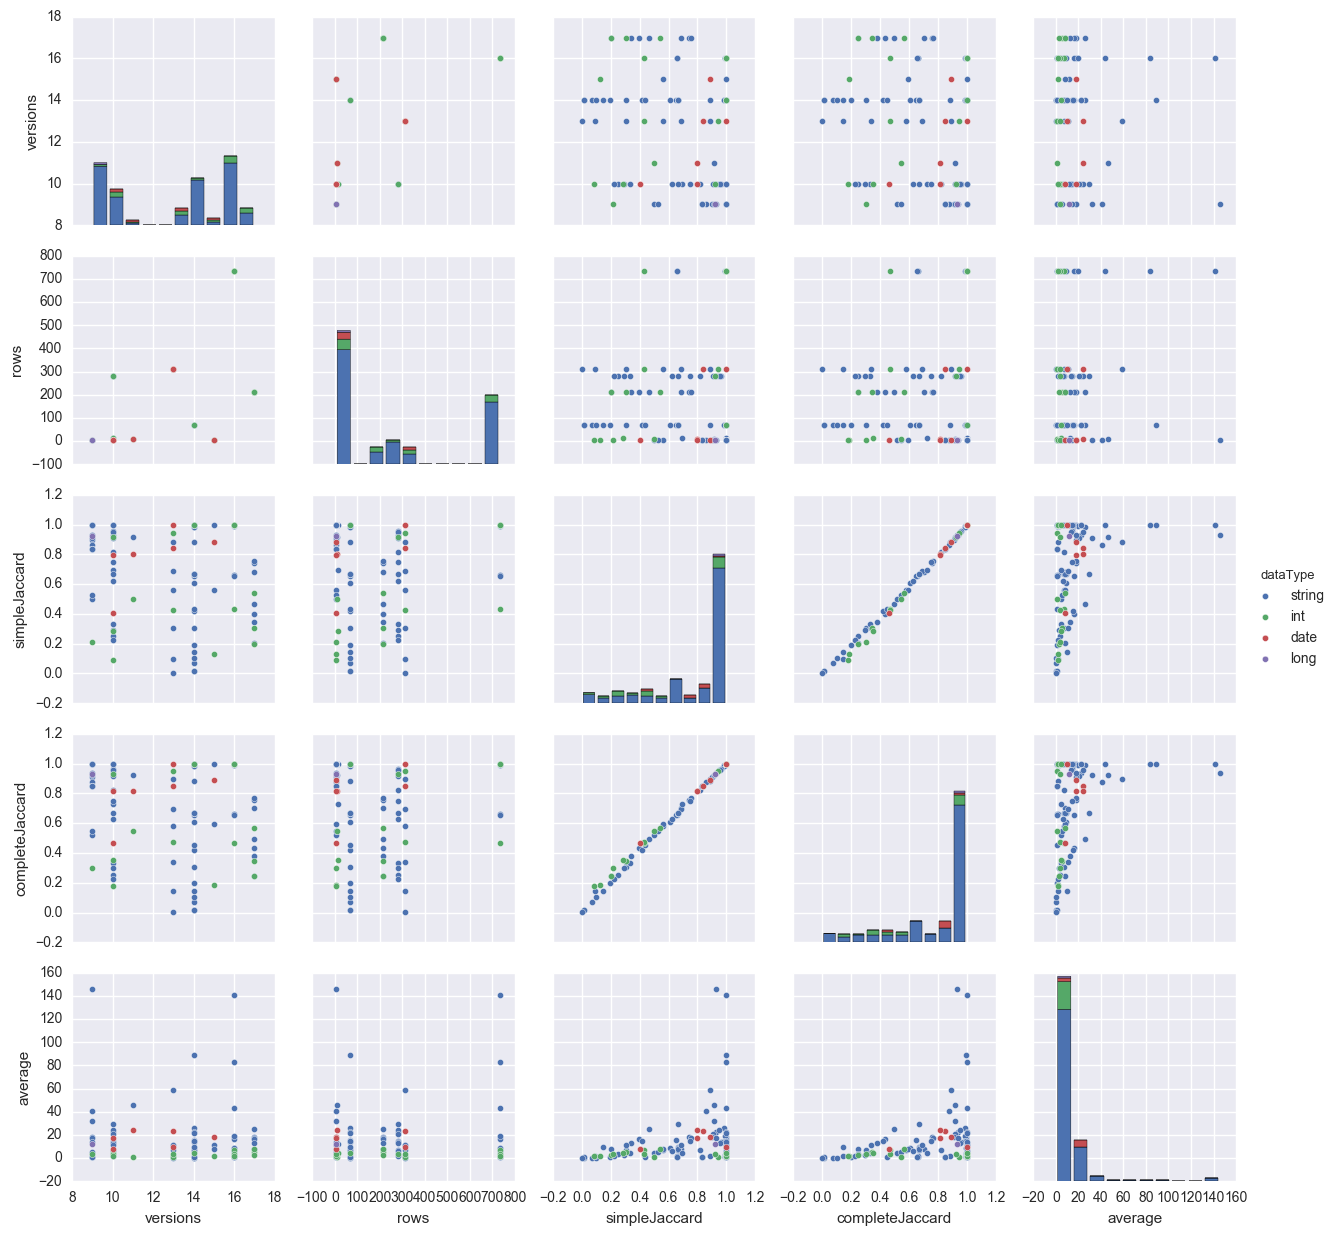

In [7]:
dfTest = df.copy()
del dfTest['folder']
del dfTest['column']
g = sns.pairplot(dfTest[(dfTest['average'] < 6000)], hue='dataType')
sns.plt.savefig("pictures/pairplotjaccard.png")
sns.plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [9]:
dfTestPCA = dfTest.copy()
del dfTestPCA['dataType']
X = dfTestPCA[(dfTest['average'] < 6000)].values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
y = dfTest[(dfTest['average'] < 6000)].ix[:,5].values
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

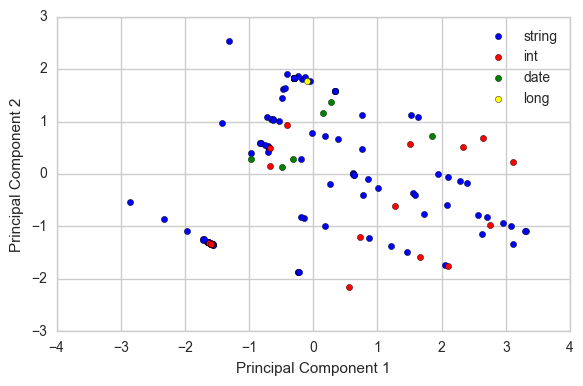

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('string', 'int', 'date', 'long'),
                        ('blue', 'red', 'green', 'yellow')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    sns.plt.savefig("pictures/principalcomponents.pdf")

    plt.show()

In [11]:
df2 = pd.read_csv('distanceOutputCells.csv',encoding="utf-8", delimiter=",")
df2.fillna('string')
df2.head()

,folder,column,row,versions,simpleJaccard,completeJaccard,average,dataType
0,5171,1,1,17,0.779375,0.792353,17.882353,string
1,5171,1,2,17,0.691875,0.710000,17.882353,string
2,5171,1,3,17,0.703125,0.720588,17.823529,string
3,5171,1,4,17,0.801250,0.812941,17.823529,string
4,5171,1,5,17,0.820000,0.830588,17.764706,string


In [12]:
df2.describe()

,folder,column,row,versions,simpleJaccard,completeJaccard,average
count,44104.000000,44104.000000,44104.000000,44104.000000,44104.000000,44104.000000,44104.000000
mean,5654.370080,18.705650,299.142209,15.153682,0.857817,0.861649,11.905433
std,335.125816,12.978632,216.486253,1.901649,0.312248,0.307405,100.827402
min,5171.000000,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000
25%,5540.000000,7.000000,109.000000,16.000000,0.980667,0.981875,1.000000
50%,5540.000000,16.000000,254.000000,16.000000,1.000000,1.000000,3.000000
75%,5540.000000,30.000000,482.000000,16.000000,1.000000,1.000000,9.000000
max,7001.000000,44.000000,732.000000,17.000000,1.000000,1.000000,10831.363636


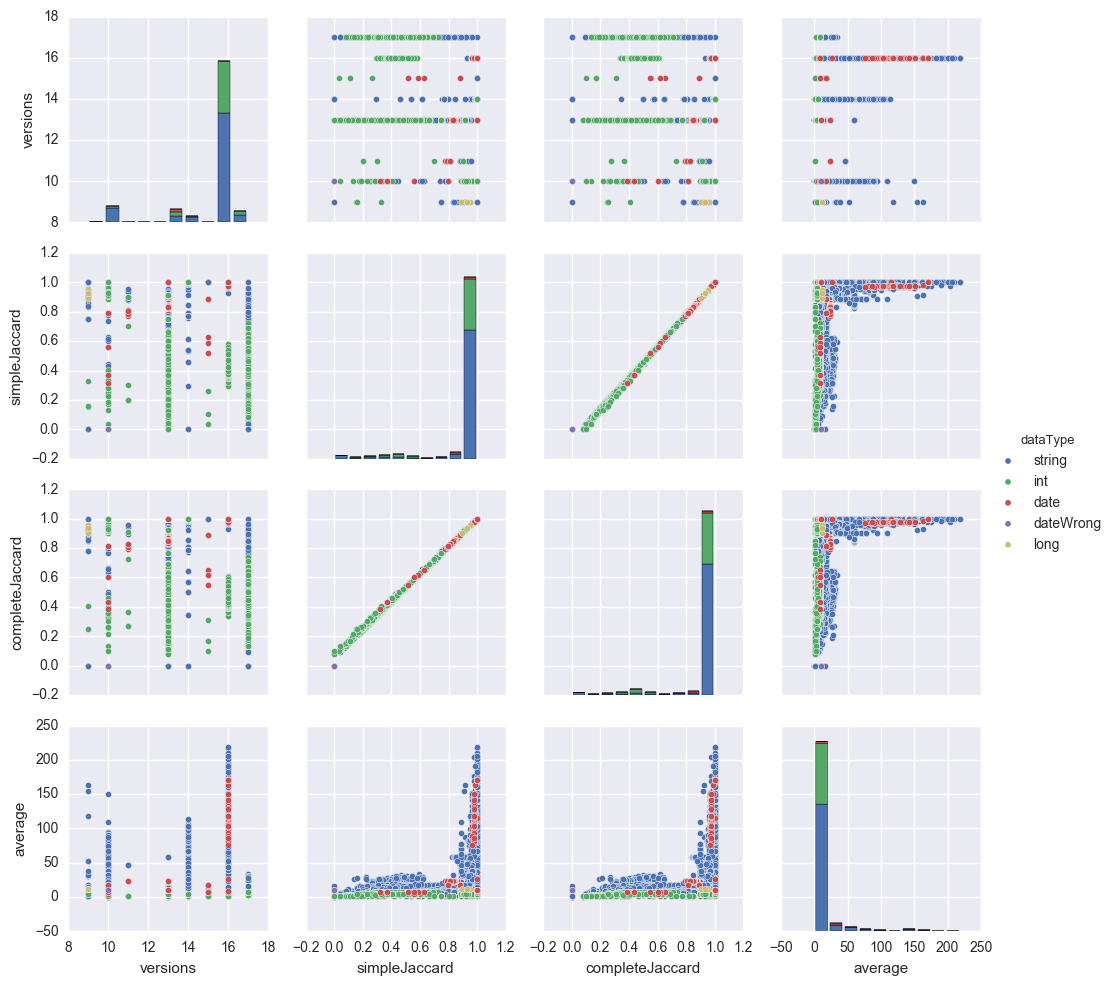

In [13]:
dfTest2 = df2.copy()
del dfTest2['folder']
del dfTest2['column']
del dfTest2['row']
g = sns.pairplot(dfTest2[(dfTest2['average'] < 2000)], hue='dataType')
sns.plt.savefig("pictures/pairplotjaccard2.pdf")

#sns.pairplot(dfTest2, hue='dataType')
sns.plt.show()

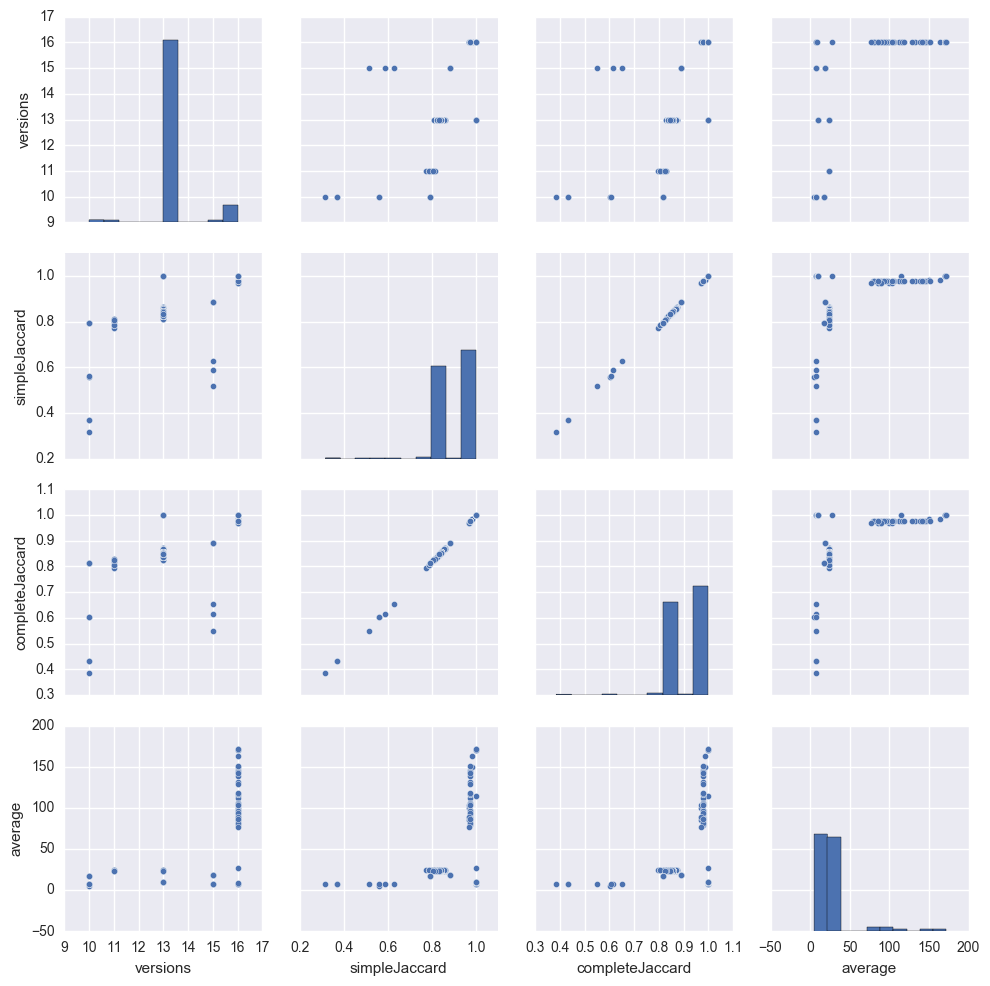

In [14]:
dfTest2 = df2.copy()
del dfTest2['folder']
del dfTest2['column']
del dfTest2['row']
g = sns.pairplot(dfTest2[(dfTest2['average'] < 2000) & (dfTest2['dataType'] == 'date')])
#sns.pairplot(dfTest2, hue='dataType')
sns.plt.show()

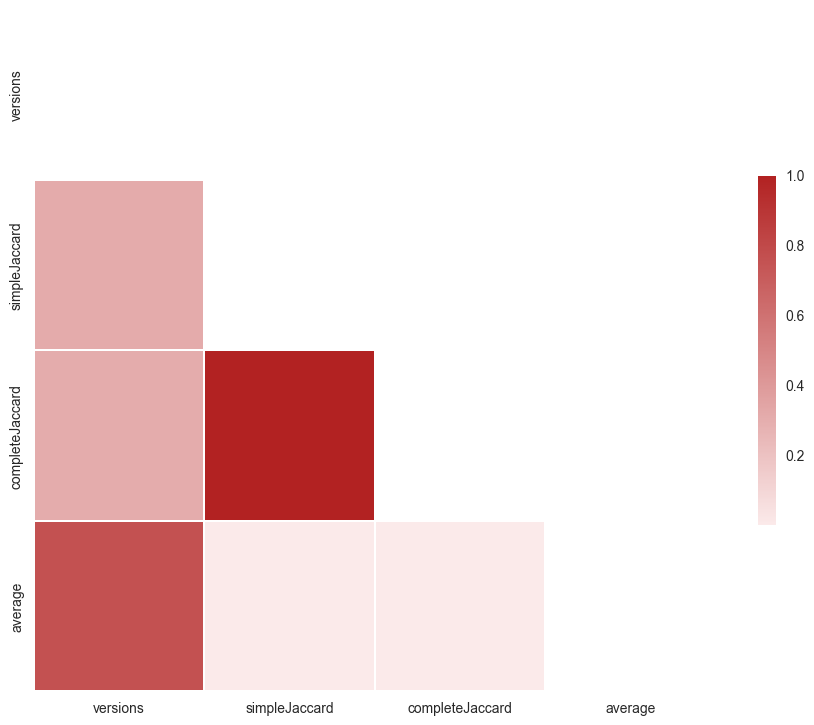

In [15]:
sns.set(style="white")
corr = dfTest2[(dfTest2['average'] < 2000) & (dfTest2['dataType'] == 'date')].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapdatejaccard.pdf")

sns.plt.show()

In [20]:
dfTestPCA2 = dfTest2.copy()
del dfTestPCA2['dataType']
X = dfTestPCA2[(dfTest2['average'] < 2000)].values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
y = dfTest2[(dfTest2['average'] < 2000)].ix[:,4].values
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

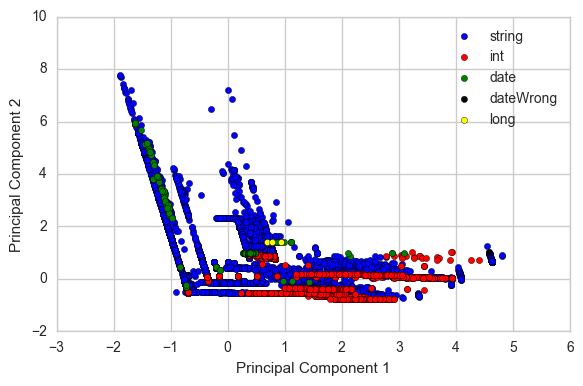

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('string', 'int', 'date', 'dateWrong', 'long'),
                        ('blue', 'red', 'green', 'black', 'yellow')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [26]:
df3 = pd.read_csv('distanceOutputCells2.csv',encoding="utf-8", delimiter=",")
df3.fillna('string')
df3[df3['changes'] == 1].head()

,folder,column,row,versions,simpleJaccard,completeJaccard,average,dataType,lehvenshtein,changes
1344,5171,7,61,17,1.0,1.0,8.0,string,0.0,1
2140,5540,1,1,16,1.0,1.0,14.0,string,0.0,1
2142,5540,1,3,16,1.0,1.0,13.0,string,0.0,1
2155,5540,1,16,16,1.0,1.0,14.0,string,0.0,1
2165,5540,1,26,16,1.0,1.0,14.0,string,0.0,1


In [27]:
df3[df3['changes'] != 1].describe()

,folder,column,row,versions,simpleJaccard,completeJaccard,average,lehvenshtein,changes
count,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000
mean,5807.814570,8.265302,183.852900,14.027694,0.696985,0.713943,21.511862,7.219849,7.039936
std,535.026621,8.137112,156.877761,2.767389,0.320804,0.308004,206.704460,129.636820,6.078778
min,5171.000000,1.000000,1.000000,9.000000,0.000000,0.000000,0.076923,0.066667,2.000000
25%,5540.000000,3.000000,72.000000,10.000000,0.422781,0.460661,7.000000,0.400000,2.000000
50%,5540.000000,6.000000,147.000000,16.000000,0.885833,0.894118,11.062500,2.222222,2.000000
75%,6618.000000,11.000000,240.000000,16.000000,0.975556,0.977500,17.882353,5.200000,13.000000
max,7001.000000,41.000000,732.000000,17.000000,1.000000,1.000000,10831.363636,7270.000000,17.000000


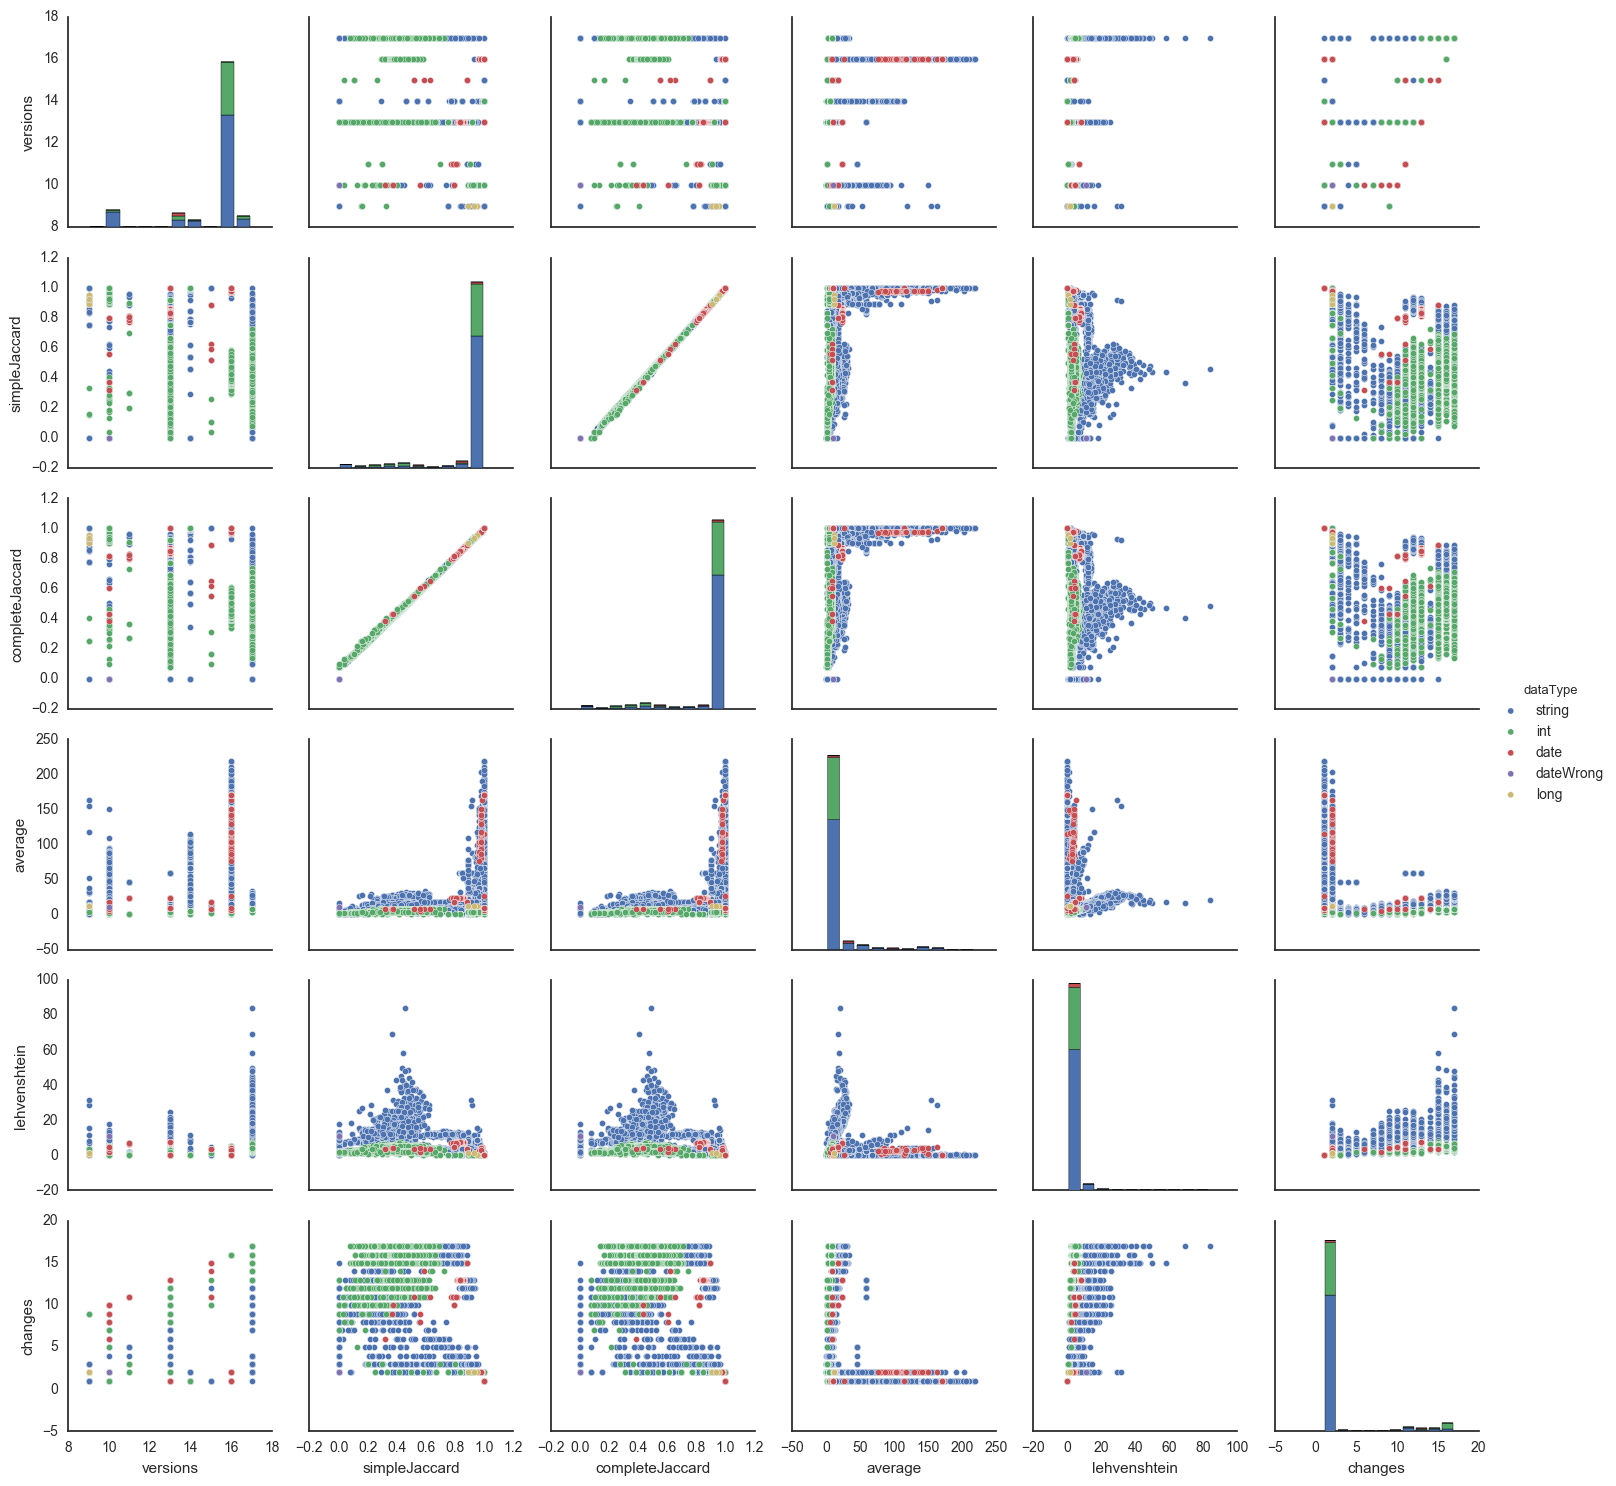

In [24]:
dfTest3 = df3.copy()
del dfTest3['folder']
del dfTest3['column']
del dfTest3['row']
g = sns.pairplot(dfTest3[(dfTest3['average'] < 2000)), hue='dataType')
sns.plt.savefig("pictures/pairplotjaccard2.pdf")

#sns.pairplot(dfTest2, hue='dataType')
sns.plt.show()

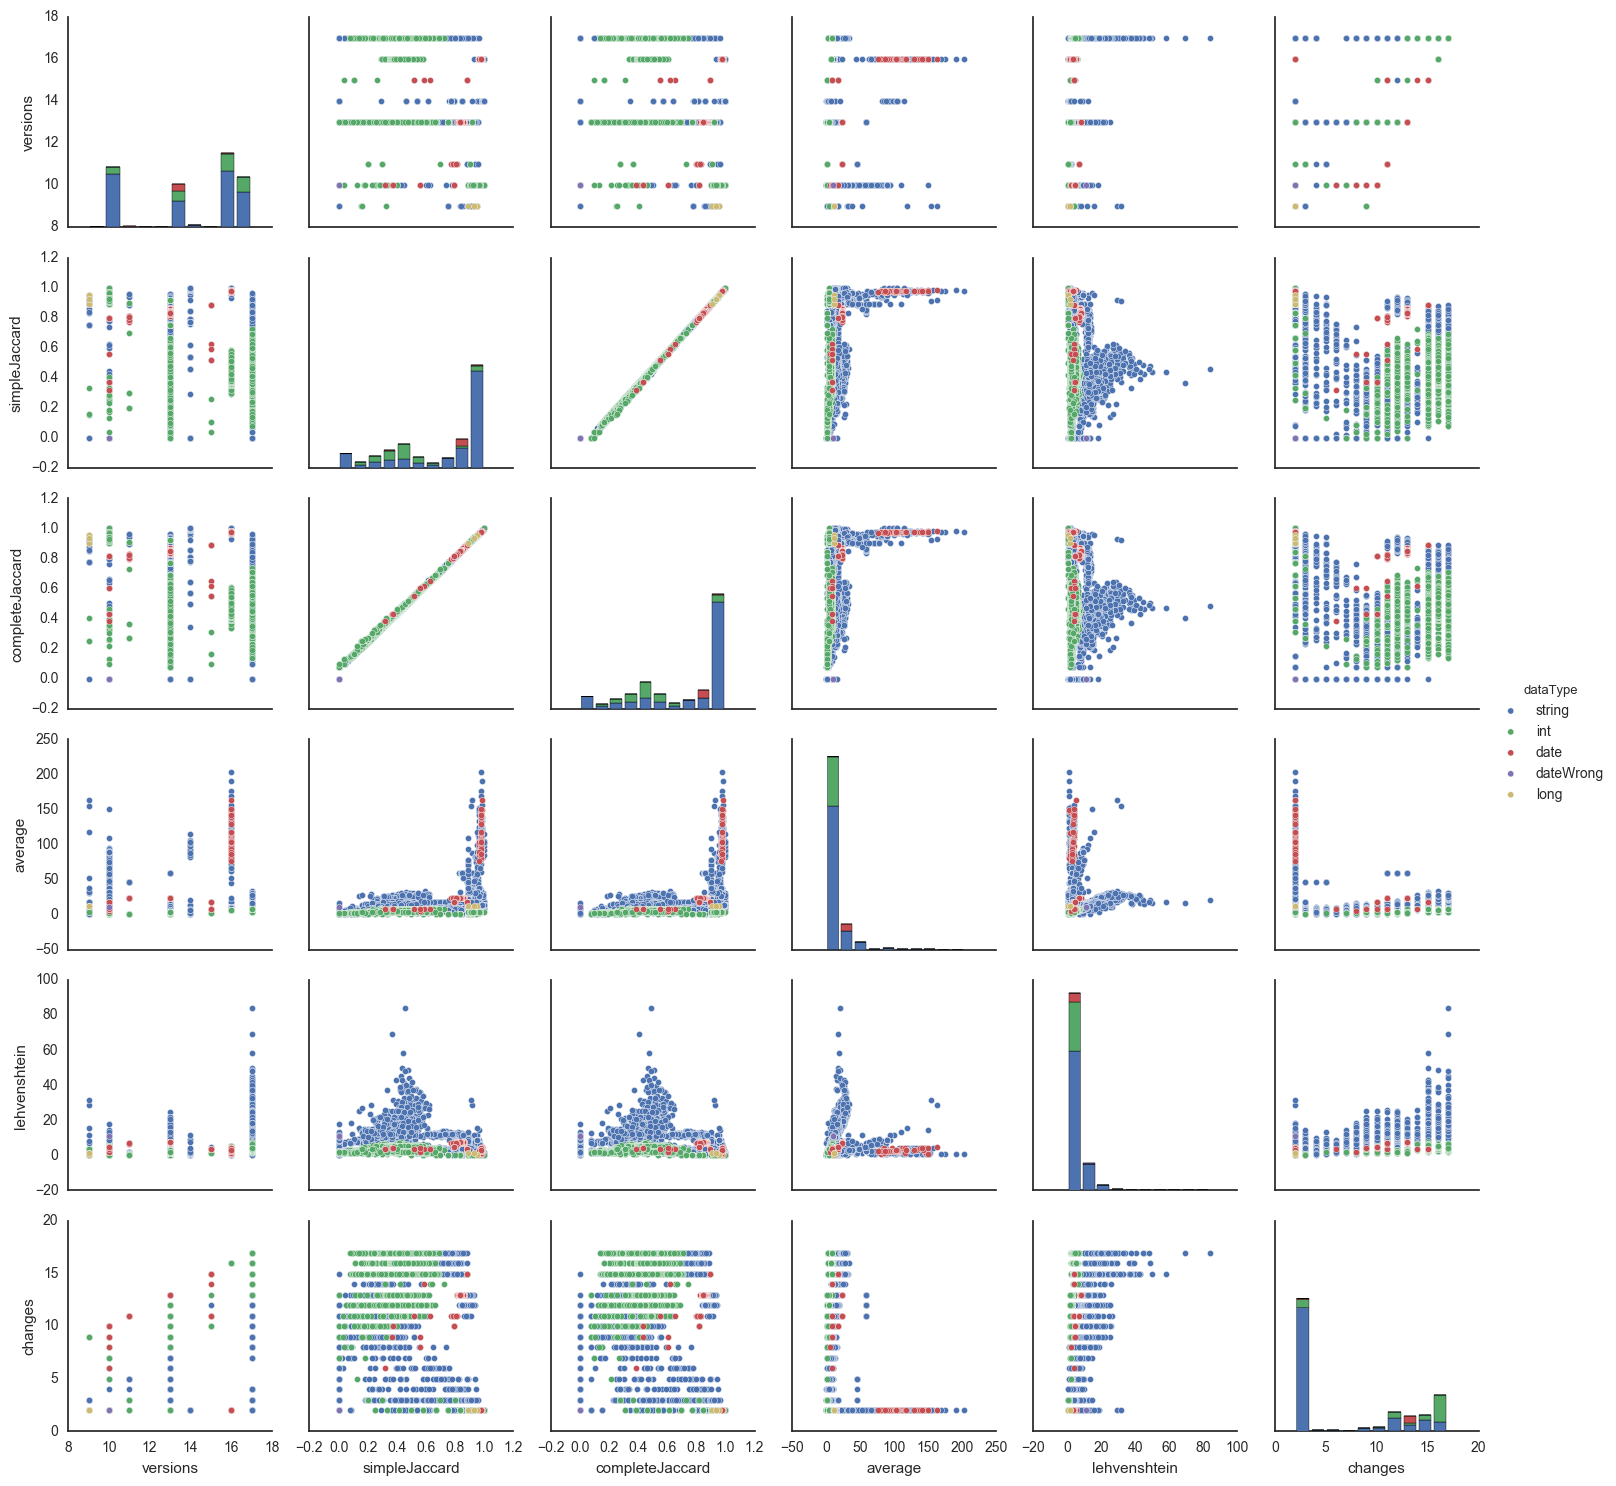

In [28]:
dfTest3 = df3.copy()
del dfTest3['folder']
del dfTest3['column']
del dfTest3['row']
g = sns.pairplot(dfTest3[(dfTest3['average'] < 2000) & (dfTest3['changes'] != 1)], hue='dataType')
sns.plt.savefig("pictures/pairplotjaccard2.pdf")

#sns.pairplot(dfTest2, hue='dataType')
sns.plt.show()

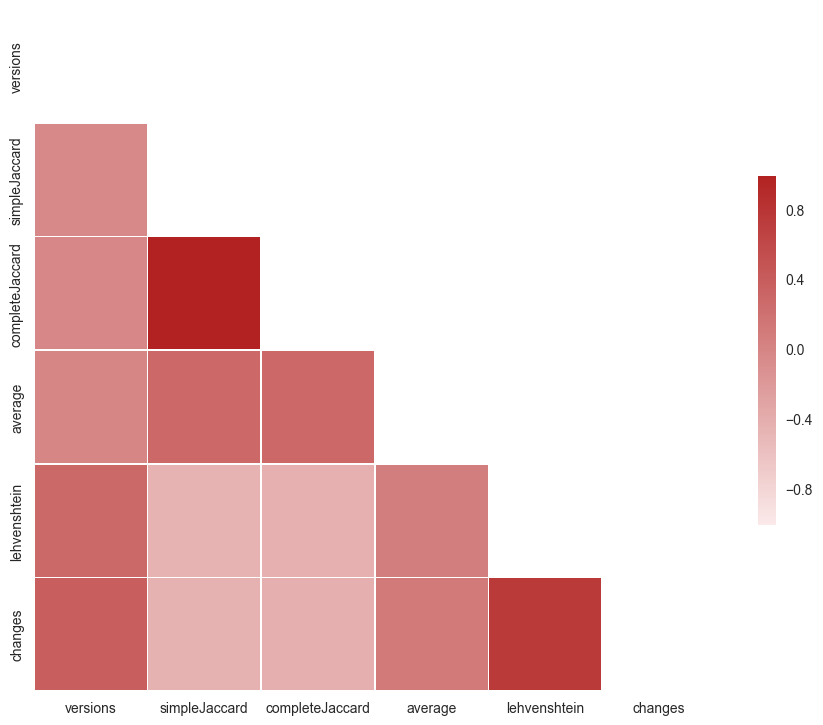

In [31]:
sns.set(style="white")
corr = dfTest3[(dfTest3['average'] < 2000) & (dfTest3['changes'] != 1) & (dfTest3['dataType'] == 'string')].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapdatejaccard.pdf")

sns.plt.show()

In [36]:
Y = dfTest3[(dfTest3['average'] < 2000) & (dfTest3['changes'] != 1)]['dataType']

In [48]:
df4 = dfTest3[(dfTest3['average'] < 2000) & (dfTest3['changes'] != 1)].copy()

In [54]:
df5 = df4.replace(np.nan, 'string', regex=True)


In [55]:
print("* data types:", df5["dataType"].unique(), sep="\n")


* data types:
['string' 'int' 'date' 'dateWrong' 'long']


In [56]:
df5.describe()

,versions,simpleJaccard,completeJaccard,average,lehvenshtein,changes
count,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000
mean,14.030431,0.696733,0.713705,15.697119,4.101568,7.043788
std,2.767141,0.320837,0.308039,17.811405,5.453723,6.080160
min,9.000000,0.000000,0.000000,0.076923,0.066667,2.000000
25%,10.000000,0.422667,0.460625,7.000000,0.400000,2.000000
50%,16.000000,0.885833,0.894118,11.062500,2.222222,2.000000
75%,16.000000,0.975556,0.977500,17.882353,5.200000,13.000000
max,17.000000,1.000000,1.000000,203.750000,83.812500,17.000000
